<a href="https://colab.research.google.com/github/chaos44/signate_competition/blob/main/ames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/chaos44/signate_competition

Cloning into 'signate_competition'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 15 (delta 1), reused 7 (delta 1), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [3]:
cd signate_competition/ams_beginner/

/content/signate_competition/ams_beginner


In [5]:
ls

data_description.txt  sample_submit.csv  test.csv  train.csv


## データ確認

In [27]:
import pandas as pd

train_data = pd.read_csv('train.csv')

In [28]:
train_data['Roof Style']

0       Gable
1       Gable
2         Hip
3       Gable
4       Gable
        ...  
2995    Gable
2996    Gable
2997    Gable
2998    Gable
2999    Gable
Name: Roof Style, Length: 3000, dtype: object

In [29]:
# データの情報を確認する
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           3000 non-null   int64  
 1   Order           3000 non-null   int64  
 2   MS SubClass     3000 non-null   int64  
 3   MS Zoning       3000 non-null   object 
 4   Lot Area        3000 non-null   int64  
 5   Lot Shape       3000 non-null   object 
 6   Land Contour    3000 non-null   object 
 7   Lot Config      3000 non-null   object 
 8   Neighborhood    3000 non-null   object 
 9   Bldg Type       3000 non-null   object 
 10  House Style     3000 non-null   object 
 11  Overall Qual    3000 non-null   int64  
 12  Overall Cond    3000 non-null   int64  
 13  Year Built      3000 non-null   int64  
 14  Year Remod/Add  3000 non-null   int64  
 15  Roof Style      3000 non-null   object 
 16  Exterior 1st    3000 non-null   object 
 17  Exterior 2nd    3000 non-null   o

In [30]:
train_data.describe()

,index,Order,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2492.964667,1248.236333,48.396667,7602.694000,5.815333,5.107333,1979.900667,1976.471667,517.089283,677.716410,773.655458,968.897333,0.773667,1311.471000,0.379999,1.694333,0.183000,2.944,1.001000,6.080333,0.418333,1.818004,358.008090,0.100000,0.154667,6.387333,2007.235667,150288.542000
std,1447.218078,839.778012,40.079273,2412.498362,1.073133,0.434982,25.464595,26.939323,432.542348,498.431545,320.844443,281.493308,21.287668,452.347226,0.484968,0.460766,0.386731,0.330,0.031612,0.972383,0.499413,0.652490,137.882480,3.161223,2.681257,1.268270,1.052852,31054.043412
min,0.000000,27.000000,20.000000,1680.000000,4.000000,3.000000,1900.000000,1950.000000,0.000298,52.682220,-192.151721,483.000000,0.000000,848.000000,0.001990,1.000000,0.000000,1.000,1.000000,4.000000,0.000000,-0.001999,-0.001881,0.000000,0.000000,1.000000,2006.000000,80000.000000
25%,1218.750000,632.000000,20.000000,6000.000000,5.000000,5.000000,1963.000000,1950.000000,0.001216,464.214812,588.148081,864.000000,0.000000,912.000000,0.002000,1.000000,0.000000,3.000,1.000000,5.000000,0.000000,1.998001,368.150937,0.000000,0.000000,6.000000,2006.000000,139000.000000
50%,2465.500000,1097.000000,20.000000,8400.000000,6.000000,5.000000,1976.000000,1967.500000,554.581463,490.341164,621.881176,864.000000,0.000000,1092.000000,0.002000,2.000000,0.000000,3.000,1.000000,6.000000,0.000000,1.998003,379.312837,0.000000,0.000000,6.000000,2007.000000,145000.000000
75%,3750.250000,2163.000000,60.000000,9600.000000,6.000000,5.000000,2005.000000,2006.000000,591.008914,821.938802,1164.610129,991.500000,0.000000,1646.000000,1.001999,2.000000,0.000000,3.000,1.000000,7.000000,1.000000,1.998004,392.790170,0.000000,0.000000,7.000000,2008.000000,158000.000000
max,4999.000000,2902.000000,190.000000,31250.000000,9.000000,8.000000,2009.000000,2009.000000,1680.095488,1874.002549,1586.250299,2362.000000,683.000000,2784.000000,1.002000,2.000000,1.000000,4.000,2.000000,10.000000,2.000000,2.998023,895.134618,100.000000,48.000000,12.000000,2010.000000,418000.000000


In [52]:
# 販売価格の最大、最小値のindexを確認
train_data['SalePrice'].idxmax()

2006

In [53]:
train_data['SalePrice'].idxmin()

142

In [72]:
train_data[train_data['index'] == 2289]

,index,Order,MS SubClass,MS Zoning,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Exter Qual,Foundation,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2006,2289,99,20,RL,1680,Reg,Lvl,Inside,NAmes,1Fam,1Story,5,5,1968,1960,Gable,Wd Sdng,Wd Sdng,TA,BrkTil,549.337287,473.967356,639.677434,TA,Y,SBrkr,672,0,1092,0.002,1,1,3,1,TA,6,0,-0.001998,-0.000926,Y,0,0,6,2009,WD,Normal,418000


In [74]:
train_data.query('SalePrice in [80000]').head(5)

,index,Order,MS SubClass,MS Zoning,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Exter Qual,Foundation,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
142,2440,2873,20,RL,6000,Reg,Lvl,Inside,NAmes,1Fam,1Story,5,5,1968,1950,Gable,VinylSd,HdBoard,TA,CBlock,584.121141,489.704220,613.423023,Ex,Y,SBrkr,864,0,864,0.001998,1,0,3,1,TA,5,0,0.998002,186.716322,Y,0,0,7,2008,WD,Normal,80000
186,1535,632,20,RL,6000,Reg,Lvl,Inside,NAmes,1Fam,1Story,5,5,1954,1950,Gable,HdBoard,HdBoard,TA,CBlock,529.324684,788.774270,622.218158,TA,Y,SBrkr,864,0,864,0.001999,1,0,3,1,TA,5,0,0.998003,188.030387,Y,0,0,10,2006,WD,Normal,80000
224,3080,208,20,RL,6000,Reg,Lvl,Inside,OldTown,2fmCon,1Story,6,5,1950,1950,Gable,HdBoard,HdBoard,TA,BrkTil,952.978042,485.227123,599.160743,TA,Y,SBrkr,1068,0,987,1.001999,1,0,3,1,TA,7,0,1.998003,372.015364,Y,0,0,6,2006,WD,Normal,80000
232,3546,2284,20,RL,6000,Reg,Lvl,Inside,SawyerW,1Fam,1Story,5,5,1994,1950,Gable,MetalSd,MetalSd,TA,PConc,521.006607,201.920543,609.227780,Ex,Y,SBrkr,1040,0,1040,0.002000,1,0,3,1,TA,7,0,0.998001,766.403528,Y,0,0,7,2008,WD,Normal,80000
256,4489,2284,70,RL,10237,Reg,Lvl,Inside,Crawfor,1Fam,2Story,6,5,1958,1950,Gable,MetalSd,HdBoard,TA,BrkTil,0.001145,491.547051,1258.037578,Ex,Y,SBrkr,1068,0,1040,0.001995,2,0,3,1,TA,7,1,0.998008,193.913123,Y,0,0,7,2006,WD,Normal,80000


In [75]:
# 数値計算に必要なライブラリ
import numpy as np
# グラフを描画するパッケージ
import matplotlib.pyplot as plt
# 機械学習ライブラリscikit-learnの線形モデル
from sklearn import linear_model

In [83]:
# 学習データ準備
x = train_data[['Lot Area', 'Bsmt Full Bath']]
y =  train_data[['SalePrice']]
x1 = train_data[['Lot Area']]
x2 = train_data[['Bsmt Full Bath']]

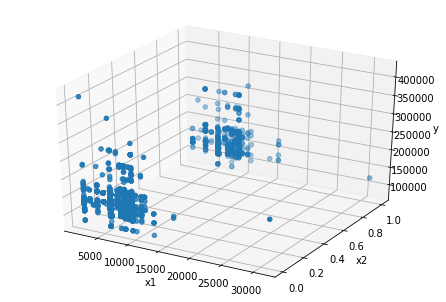

In [85]:
# 可視化
from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure()
ax=Axes3D(fig)

ax.scatter3D(x1, x2, y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

plt.show()

In [86]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
print(model_lr.coef_)
print(model_lr.intercept_)
print(model_lr.score(x, y))

[[9.46302799e-01 6.78385462e+03]]
[140516.23076432]
0.016959099535203914
